In [175]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/immunity.py
%run ../Scripts/altimmunity.py
%run ../Scripts/initMethods.py

In [162]:
params = { #parameters relevant for the equations
    "Nh":           100000,
    "N0":           100000,
    "M":                1, #Also L, total number of spacers
    "beta":             1,
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "initial_mean_n":         [0,-40],
    "initial_var_n":               10,
    "initial_mean_nh":         [0,40],
    "initial_var_nh":              10,
    "num_threads":                  4,
    "tail_axis":               [1, 1],
    "conv_size":                2000,
    }

In [163]:
nh0 = init_guassian(params["Nh"], sim_params, "nh")

n0 = init_guassian(params["N0"], sim_params, "n")

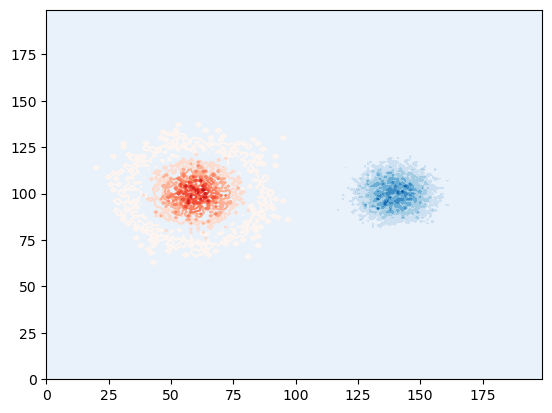

In [65]:
plt.contour(nh0.todense(), cmap="Reds")
plt.contourf(n0.todense(), cmap="Blues")
plt.show()

In [120]:
Nh = params["Nh"]
N = np.sum(n0)
num_threads = sim_params["num_threads"]

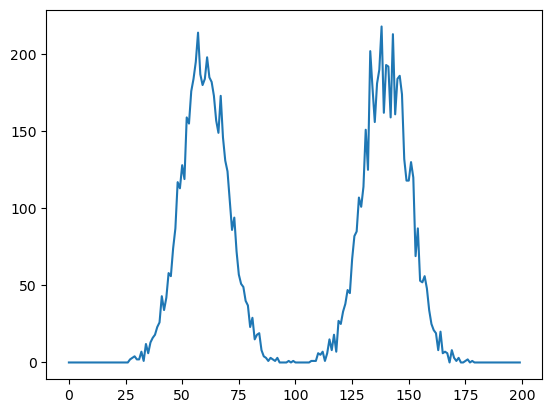

In [157]:
params["beta"] = 0.0000001
guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
plt.plot(flat_nh_new, label = f"beta = {0}")

/Users/zhizhang144515/Documents/CRISPR_Sim/Scripts/initMethods.py:199: RuntimeWarning: overflow encountered in exp
  matrix_ker = np.exp(-exp_radius/kernel)


Text(0.5, 1.0, 'Gaussian Acquisition Kernel')

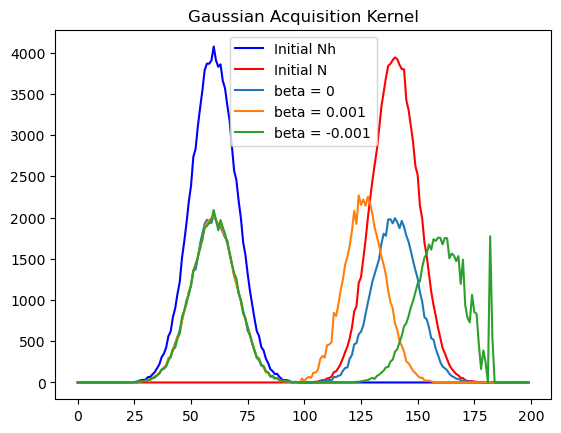

In [166]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.001, -0.001]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

plt.legend()
plt.title("Gaussian Acquisition Kernel")

Text(0.5, 1.0, 'Boltzmann Acquisition Kernel')

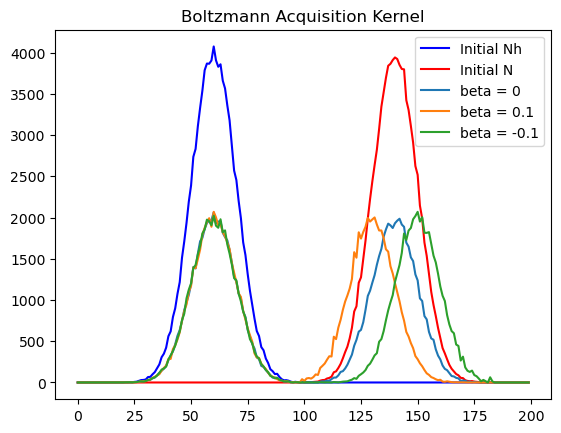

In [171]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.1, -0.1]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=1)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

plt.legend()
plt.title("Boltzmann Acquisition Kernel")

/Users/zhizhang144515/Documents/CRISPR_Sim/Scripts/initMethods.py:199: RuntimeWarning: overflow encountered in exp
  matrix_ker = np.exp(-exp_radius/kernel)


Text(0.5, 1.0, 'Gaussian Acquisition Kernel')

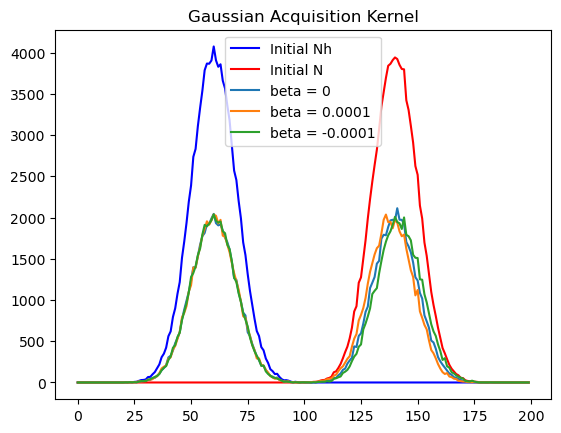

In [176]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.0001, -0.0001]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

plt.legend()
plt.title("Gaussian Acquisition Kernel")